<a href="https://colab.research.google.com/github/GodaBac/BachelorThesis/blob/main/PACF/PACF_and_SARIMAX_standardized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
from datetime import datetime

input_file_path = '/content/drive/MyDrive/Bakalauras/duomenys.csv'

# Open the input CSV file
with open(input_file_path, 'r') as input_file:
    reader = csv.reader(input_file)

    value_names = next(reader)

    # Create an empty list to store the updated rows
    updated_rows = []

    # Loop through each row in the input file
    for row in reader:
         # Try to parse the date string as a datetime object
        try:
            date_str = row[0]
            date_obj = datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            # If the date string is not in the expected format, skip this row
            continue

        # Format the date object as a string in the new format
        new_date_str = date_obj.strftime('%Y-%m-%d')

        # Update the date value in the row
        row[0] = new_date_str
        # Append the updated row to the list of updated rows
        updated_rows.append(row)

# Convert the list of updated rows to a dataframe
df = pd.DataFrame(updated_rows, columns=value_names)
df['DT'] = pd.to_datetime(df['DT'])
df['ANTAL_01'] = df['ANTAL_01'].astype(int)
df = df.set_index('DT')
df = df.iloc[::-1]

Mounted at /content/drive


In [ ]:
df

,ANTAL_01
DT,
2015-12-31,46084
2016-01-04,46026
2016-01-05,46108
2016-01-06,45995
2016-01-07,45954
...,...
2022-12-15,30280
2022-12-16,30213
2022-12-19,30152


In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = df.values
print(values)
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
 print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
 print(inversed[i])
df['ANTAL_01'] = normalized
print(df)

[[46084]
 [46026]
 [46108]
 ...
 [30152]
 [30121]
 [30090]]
Mean: 40906.524202, StandardDeviation: 4750.513865
[1.089877]
[1.07766779]
[1.09492908]
[1.07114218]
[1.06251154]
[46084.]
[46026.]
[46108.]
[45995.]
[45954.]
            ANTAL_01
DT                  
2015-12-31  1.089877
2016-01-04  1.077668
2016-01-05  1.094929
2016-01-06  1.071142
2016-01-07  1.062512
...              ...
2022-12-15 -2.236921
2022-12-16 -2.251025
2022-12-19 -2.263865
2022-12-20 -2.270391
2022-12-21 -2.276917

[1818 rows x 1 columns]


In [ ]:
#training and test
training = df.iloc[:-16,:]
print(training.index)
testing = df.iloc[-16:, :]
training,testing, len(training), len(testing)

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-28', '2022-11-29'],
              dtype='datetime64[ns]', name='DT', length=1802, freq=None)


(            ANTAL_01
 DT                  
 2015-12-31  1.089877
 2016-01-04  1.077668
 2016-01-05  1.094929
 2016-01-06  1.071142
 2016-01-07  1.062512
 ...              ...
 2022-11-23 -2.061572
 2022-11-24 -2.077149
 2022-11-25 -2.071044
 2022-11-28 -2.073991
 2022-11-29 -2.105146
 
 [1802 rows x 1 columns],
             ANTAL_01
 DT                  
 2022-11-30 -1.831281
 2022-12-01 -1.764551
 2022-12-02 -1.786864
 2022-12-05 -2.105988
 2022-12-06 -2.139458
 2022-12-07 -2.171665
 2022-12-08 -2.200083
 2022-12-09 -2.202398
 2022-12-12 -2.224501
 2022-12-13 -2.237553
 2022-12-14 -2.258182
 2022-12-15 -2.236921
 2022-12-16 -2.251025
 2022-12-19 -2.263865
 2022-12-20 -2.270391
 2022-12-21 -2.276917,
 1802,
 16)

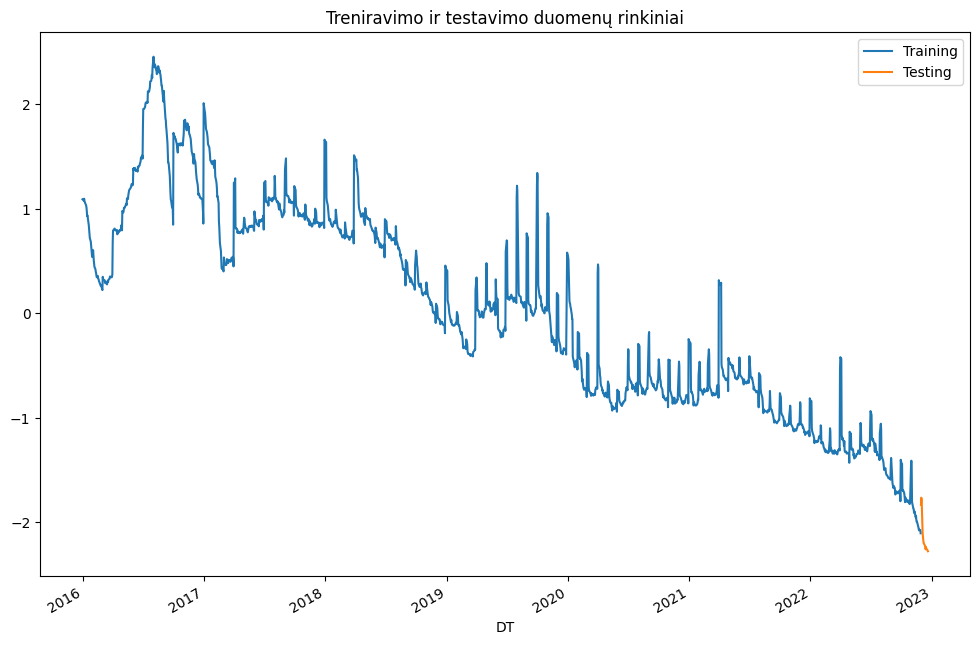

In [ ]:
import matplotlib.pyplot as plt
training['ANTAL_01'].astype(float).plot(figsize=(12, 8), label='Training')
testing['ANTAL_01'].astype(float).plot(label='Testing')
plt.title('Treniravimo ir testavimo duomenų rinkiniai')
plt.legend()

In [ ]:
pacf = sm.tsa.pacf(training['ANTAL_01'].dropna(), nlags=262)

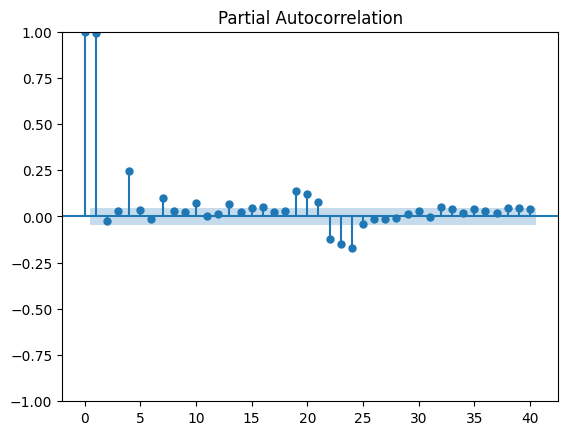

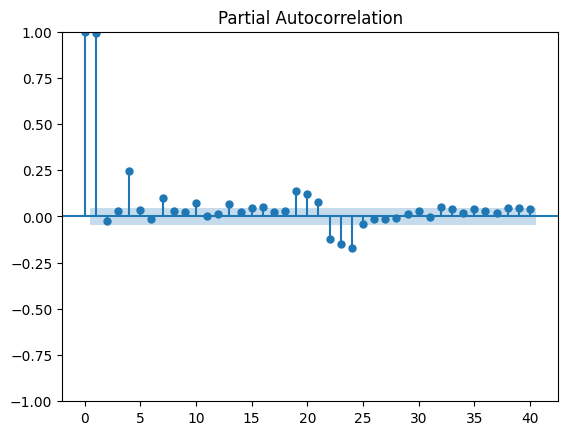

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(training.dropna(), lags = 40, method = "ols")

In [ ]:
training.dropna()

,ANTAL_01
DT,
2015-12-31,1.089877
2016-01-04,1.077668
2016-01-05,1.094929
2016-01-06,1.071142
2016-01-07,1.062512
...,...
2022-11-23,-2.061572
2022-11-24,-2.077149
2022-11-25,-2.071044


In [ ]:
# repeat the ACF values until it matches the length of the training dataset
pacf_repeated = np.tile(pacf, int(np.ceil(len(training) / len(pacf))))[:len(training)]
pacf_repeated

array([ 1.        ,  0.991156  , -0.01891984, ...,  0.01818542,
        0.03896284,  0.00206298])

In [ ]:
# create a DataFrame with the repeated ACF values as a column
exog = pd.DataFrame({'pacf': pacf_repeated}, index=training.index)
exog

,pacf
DT,
2015-12-31,1.000000
2016-01-04,0.991156
2016-01-05,-0.018920
2016-01-06,0.023602
2016-01-07,0.216646
...,...
2022-11-23,-0.017506
2022-11-24,0.039619
2022-11-25,0.018185


In [ ]:
# drop any rows with missing values from the exog dataframe
exog = exog.dropna()
exog

,pacf
DT,
2015-12-31,1.000000
2016-01-04,0.991156
2016-01-05,-0.018920
2016-01-06,0.023602
2016-01-07,0.216646
...,...
2022-11-23,-0.017506
2022-11-24,0.039619
2022-11-25,0.018185


In [ ]:
np.asarray(training)

array([[ 1.089877  ],
       [ 1.07766779],
       [ 1.09492908],
       ...,
       [-2.0710442 ],
       [-2.07399125],
       [-2.10514578]])

In [ ]:
# fit SARIMAX model with exogenous variable
model = sm.tsa.SARIMAX(training['ANTAL_01'].astype(float), exog=np.asarray(exog), order=(1,0,1), seasonal_order=(1,0,1,22))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
exogTest = exog.tail(22)
exogTest2 = exogTest.head(len(testing))
exogTest2
exogvar = np.asarray(exogTest2['pacf'])
exogvar = np.asarray(exogTest2['pacf'])
# make predictions with the fitted model and exogenous variables for test dataset
test_exog = pd.DataFrame({'pacf': exogvar}, index=testing.index)
test_exog

,pacf
DT,
2022-11-30,0.026169
2022-12-01,0.012491
2022-12-02,0.018803
2022-12-05,-0.001914
2022-12-06,0.002062
2022-12-07,0.020893
2022-12-08,0.019306
2022-12-09,0.007888
2022-12-12,0.010651


In [ ]:
# predict using SARIMAX model
pred = result.predict(start=len(training), end=len(training)+len(testing)-1, exog=test_exog)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


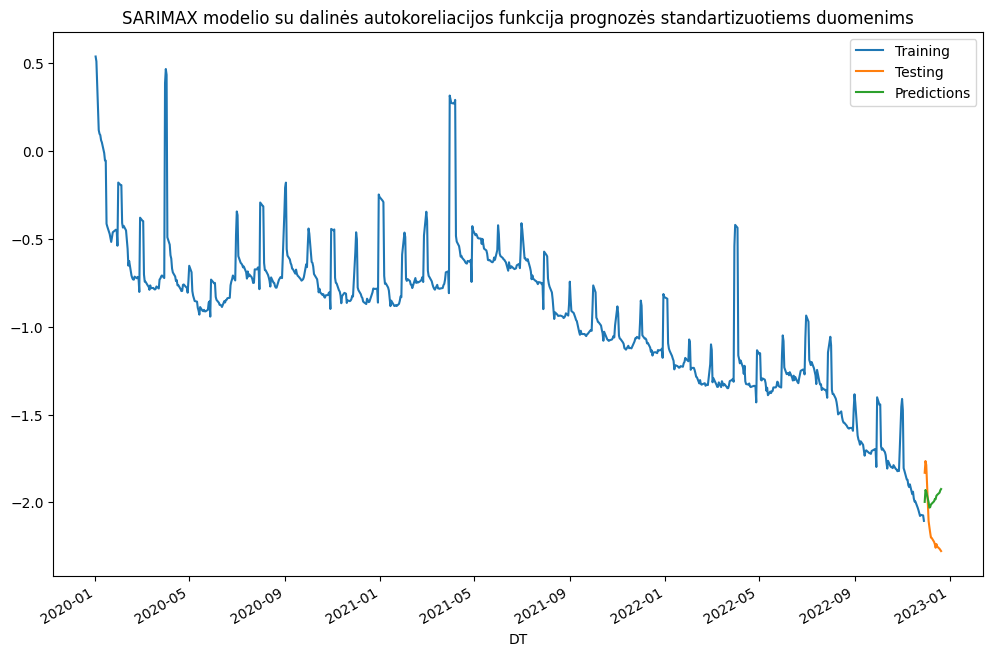

In [ ]:
import matplotlib.pyplot as plt
training['ANTAL_01'].astype(float)['2020-01-01':].plot(figsize=(12, 8), label='Training')
testing['ANTAL_01'].astype(float).plot(label='Testing')
pred.index = testing.index
pred.plot(label='Predictions')
plt.title('SARIMAX modelio su dalinės autokoreliacijos funkcija prognozės standartizuotiems duomenims')
plt.legend()

In [ ]:
pred, testing['ANTAL_01']

(DT
 2022-11-30   -1.997077
 2022-12-01   -1.929142
 2022-12-02   -1.939678
 2022-12-05   -1.999023
 2022-12-06   -2.029594
 2022-12-07   -2.027108
 2022-12-08   -2.012009
 2022-12-09   -2.007376
 2022-12-12   -1.993750
 2022-12-13   -1.981211
 2022-12-14   -1.981862
 2022-12-15   -1.962587
 2022-12-16   -1.957076
 2022-12-19   -1.944564
 2022-12-20   -1.931094
 2022-12-21   -1.923951
 Name: predicted_mean, dtype: float64,
 DT
 2022-11-30   -1.831281
 2022-12-01   -1.764551
 2022-12-02   -1.786864
 2022-12-05   -2.105988
 2022-12-06   -2.139458
 2022-12-07   -2.171665
 2022-12-08   -2.200083
 2022-12-09   -2.202398
 2022-12-12   -2.224501
 2022-12-13   -2.237553
 2022-12-14   -2.258182
 2022-12-15   -2.236921
 2022-12-16   -2.251025
 2022-12-19   -2.263865
 2022-12-20   -2.270391
 2022-12-21   -2.276917
 Name: ANTAL_01, dtype: float64)

In [ ]:
predictions = pred

In [ ]:
# inverse transform and print the first 5 rows
normalized_predictions = predictions.values.reshape((len(predictions.values), 1))
print(normalized_predictions)
inversed = scaler.inverse_transform(normalized_predictions)
print(inversed)

[[-1.99707745]
 [-1.92914239]
 [-1.93967781]
 [-1.99902304]
 [-2.02959425]
 [-2.02710831]
 [-2.01200869]
 [-2.00737634]
 [-1.99374977]
 [-1.98121108]
 [-1.98186193]
 [-1.96258738]
 [-1.95707577]
 [-1.94456397]
 [-1.93109372]
 [-1.92395075]]
[[31419.38009235]
 [31742.10652693]
 [31692.05787211]
 [31410.1375202 ]
 [31264.90858243]
 [31276.71806978]
 [31348.44904164]
 [31370.45507877]
 [31435.18830006]
 [31494.75350855]
 [31491.6616188 ]
 [31583.22562144]
 [31609.4086177 ]
 [31668.84611939]
 [31732.83668837]
 [31766.76949062]]
